<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Различия-концентрации-металлов-на-разных-этапах-очистки" data-toc-modified-id="Различия-концентрации-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Различия концентрации металлов на разных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

**Технологический процесс**

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant  
 1. Xanthate **— ксантогенат (промотер, или активатор флотации);
 2. Sulphate — сульфат (на данном производстве сульфид натрия);
 3. Depressant — депрессант (силикат натрия).


- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

## Подготовка данных

### Общая информация

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer, fbeta_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.dummy import DummyRegressor

state = np.random.RandomState(12345)


In [3]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
train.info()
print('\nКоличество дубликатов:', train.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
test.info()
print('\nКоличество дубликатов:', test.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
df.info()
print('\nКоличество дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [8]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [9]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [10]:
df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


- Явные дубликаты отсутсвтуют.
- В данных присутствуют пропуски.
- В тестовой выборке нет неторых признаков, которые есть в обучающей выборке. В частности отсутствуют целевые признаки  'rougher.output.recovery' и 'final.output.recovery'.


### Расчет эффективности обогащения

Эффективность обогащения рассчитывается по формуле

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

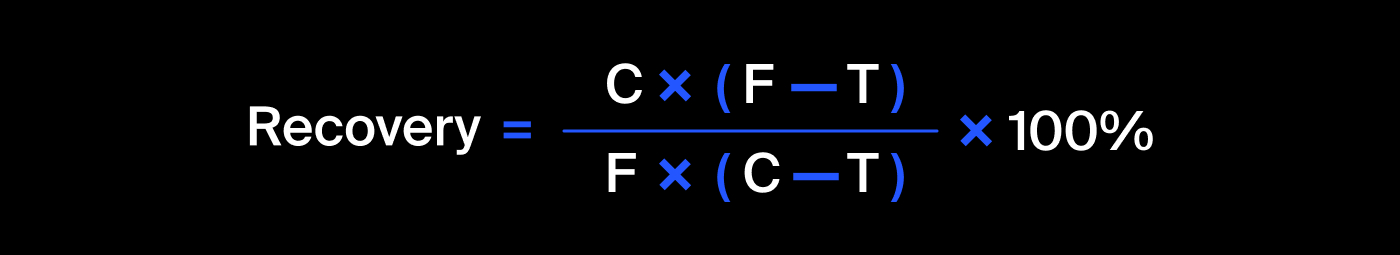

In [11]:
recovery = train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - 
        train['rougher.output.tail_au']) / train['rougher.input.feed_au'] / (train['rougher.output.concentrate_au'] - 
        train['rougher.output.tail_au']) * 100                                                                 
print('Эффективность обогащения:', recovery, '\nMAE:', mean_absolute_error(train['rougher.output.recovery'], recovery))

Эффективность обогащения: 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64 
MAE: 1.0748911125799084e-14


Полученные значения МАЕ близки к 0. Значит, эффективность обогащения рассчитана правильно.

### Предобработка данных

Проверим, какие признаки отсутствуют в тестовой выборке.

In [12]:
def delete_features(df1, df2):
    return set(df1.columns.to_list()) - set(df2.columns.to_list())

In [13]:
missing_test = delete_features(train, test)
print(train[missing_test].dtypes)

final.output.concentrate_pb                           float64
final.output.concentrate_ag                           float64
final.output.tail_au                                  float64
final.output.tail_pb                                  float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
rougher.output.concentrate_sol                        float64
primary_cleaner.output.concentrate_au                 float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
final.output.concentrate_au                           float64
rougher.output.tail_ag                                float64
rougher.output.concentrate_au                         float64
rougher.output.tail_au                                float64
rougher.output.tail_sol                               float64
primary_cleaner.output.concentrate_sol                float64
final.output.concentrate_sol                          float64
final.output.recovery                                 float64
secondar

Заполним пропуски ближайшими значениями методом ffill. 

In [14]:
for data in [train, test, df]:
    data.ffill(axis='rows', inplace=True)
    print(data.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner

## Анализ данных

### Различия концентрации металлов на разных этапах очистки

In [15]:
au = train[["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
ag = train[["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
pb = train[["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


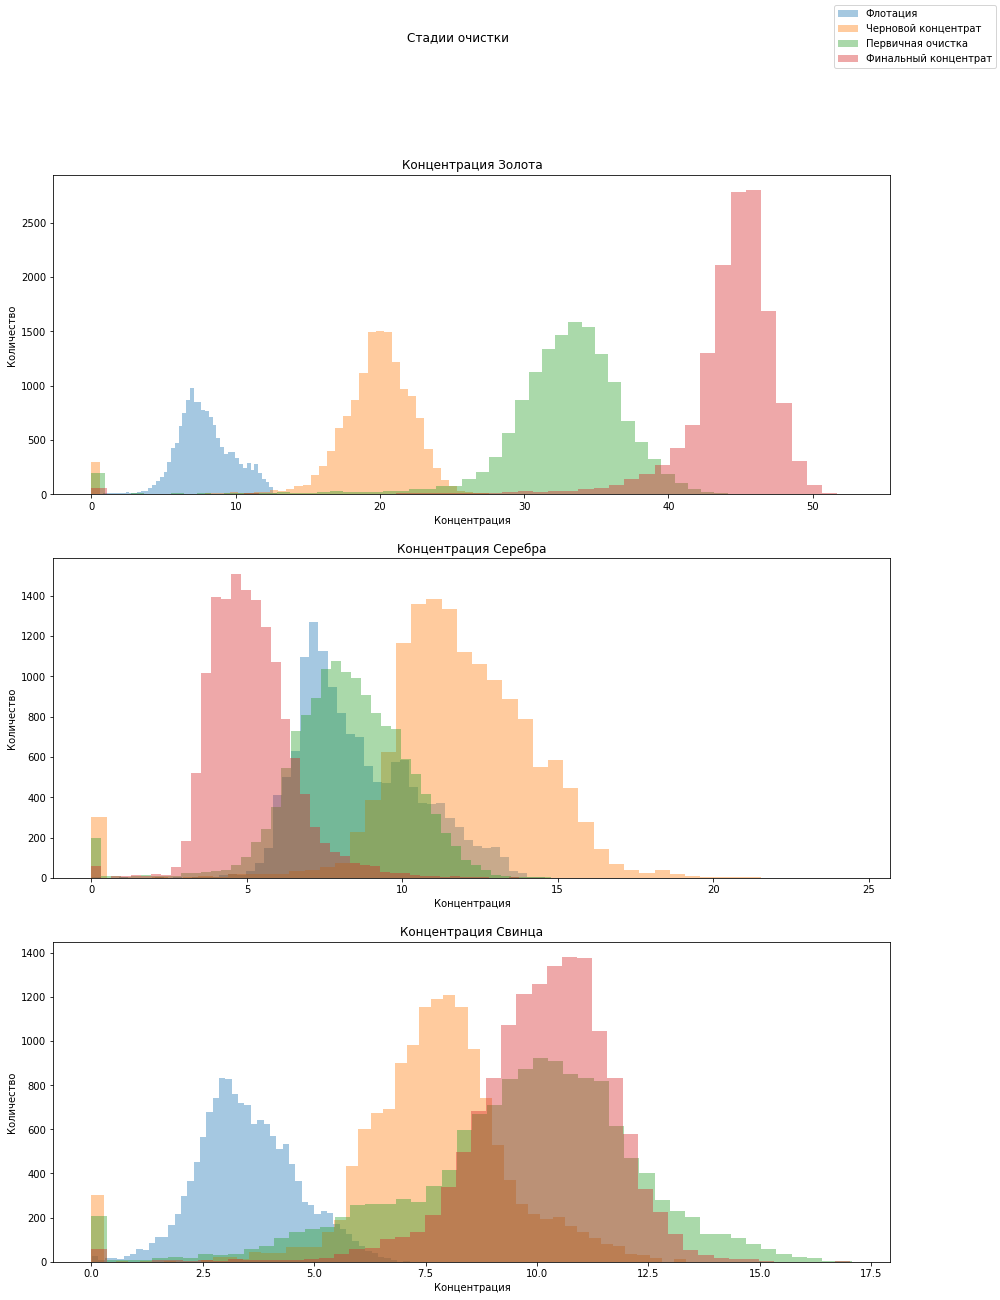

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
for column in list(au):
    sns.distplot(au[column], ax=axes[0], kde=False)
axes[0].set(title="Концентрация Золота", xlabel="Концентрация", ylabel="Количество")
for column in list(ag):
    sns.distplot(ag[column], ax=axes[1], kde=False)
axes[1].set(title="Концентрация Серебра", xlabel="Концентрация", ylabel="Количество")
for column in list(pb):
    sns.distplot(pb[column], ax=axes[2], kde=False)
axes[2].set(title="Концентрация Свинца", xlabel="Концентрация", ylabel="Количество")
fig.suptitle("Стадии очистки")
fig.legend(["Флотация", "Черновой концентрат", "Первичная очистка", "Финальный концентрат",])
fig.show()

1. Доля золота на после каждого этапа очитски постепенно увеличивается.
2. Концентрация серебра уменьшается в процессе очистки. Самая большая концентрация на первой стадии и самая маленькая на конечной.
3. Концентрация свинца значительно повышается от стадии флотации к первичной очистке, и еще немного повышается на стадии финальной очистки.

### Распределение размеров гранул сырья

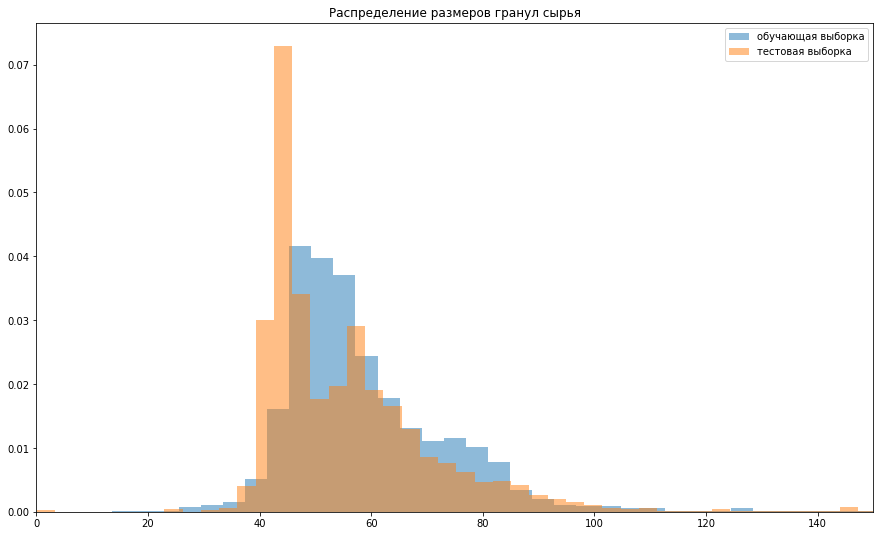

In [27]:
plt.figure(figsize=[15, 9])

plt.hist(train['rougher.input.feed_size'], label='обучающая выборка', bins=120, alpha=.5, density=True)
plt.hist(test['rougher.input.feed_size'], label='тестовая выборка', bins=120, alpha=.5, density=True)

plt.xlim([0, 150])
#plt.ylim([0, 20])

plt.legend()

plt.title('Распределение размеров гранул сырья', fontsize=12)
plt.show()

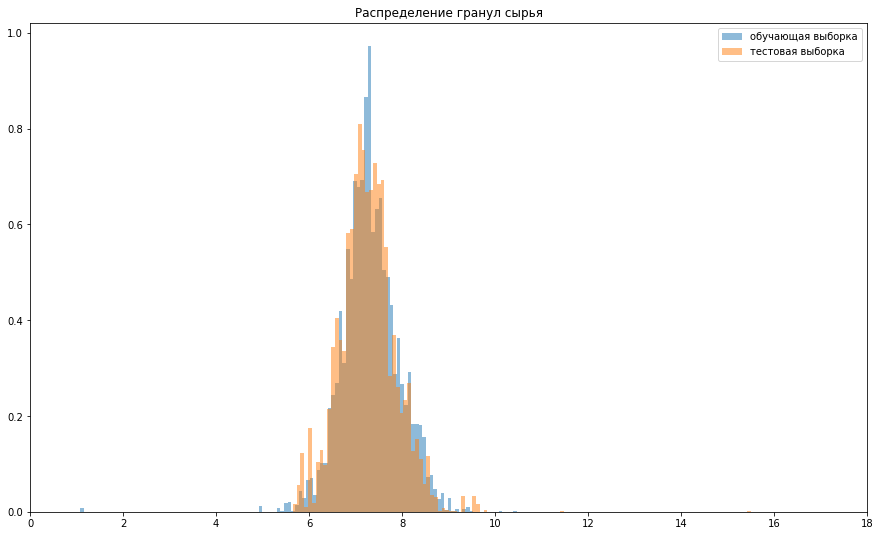

In [25]:
plt.figure(figsize=[15, 9])

plt.hist(train['primary_cleaner.input.feed_size'], label='обучающая выборка', bins=120, alpha=.5, density=True)
plt.hist(test['primary_cleaner.input.feed_size'], label='тестовая выборка', bins=120, alpha=.5, density=True)

plt.xlim([0, 18])
#plt.ylim([0, 900])

plt.legend()

plt.title('Распределение гранул сырья', fontsize=12)
plt.show()

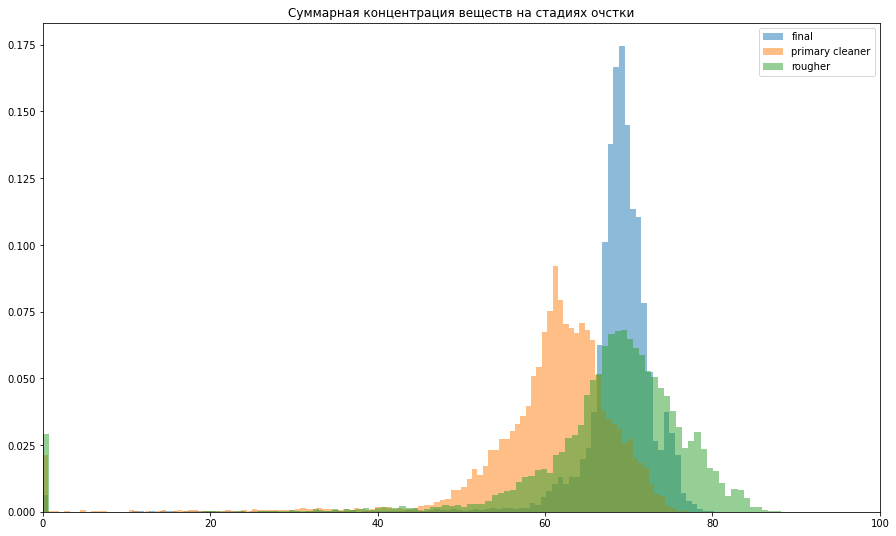

In [26]:
final = (train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + 
               train['final.output.concentrate_pb'] + train['final.output.concentrate_sol'])
primary_cleaner = (train['primary_cleaner.output.concentrate_au'] + train['primary_cleaner.output.concentrate_ag'] + 
                train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol'])
rougher = (train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_ag'] +
           train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol'])


plt.figure(figsize=[15, 9])

plt.hist(final, label='final', bins=120, alpha=.5, density=True)
plt.hist(primary_cleaner, label='primary cleaner', bins=120, alpha=.5, density=True)
plt.hist(rougher, label='rougher', bins=120, alpha=.5, density=True)

plt.xlim([0, 100])
#plt.ylim([0, 1500])

plt.legend()

plt.title('Суммарная концентрация веществ на стадиях очстки', fontsize=12)
plt.show()

1. Распределения гранул похожи, что говорит об однородности данных размеров сырья в выборках train и test
2. Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.


Удалим аномальные нулевые значения

In [28]:
train = train[(train['rougher.output.concentrate_au'] != 0) & (train['rougher.output.concentrate_ag'] != 0) & (train['rougher.output.concentrate_pb'] != 0) & (train['rougher.output.concentrate_sol'] != 0)]
train = train[(train['final.output.concentrate_au'] != 0) & (train['final.output.concentrate_ag'] != 0) & (train['final.output.concentrate_pb'] != 0) & (train['final.output.concentrate_sol'] != 0)]

df = df[(df['rougher.output.concentrate_au'] != 0) & (df['rougher.output.concentrate_ag'] != 0) & (df['rougher.output.concentrate_pb'] != 0) & (df['rougher.output.concentrate_sol'] != 0)]
df = df[(df['final.output.concentrate_au'] != 0) & (df['final.output.concentrate_ag'] != 0) & (df['final.output.concentrate_pb'] != 0) & (df['final.output.concentrate_sol'] !=0)]

## Модель

In [29]:
#датасет с целевыми признаками. Добавим их в тестовую
df_target = df[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [30]:
test = test.merge(df_target, how ='left', on ='date')

In [31]:
#Сделаем выборки одинаковыми по признакам
test.drop(['date'], axis=1, inplace=True)

train = train.drop(set(train.columns)-set(test.columns), axis=1)

In [32]:
#Функция для расчета sMAPE
def smape_total(target_rougher, predicted_rougher, target_final, predicted_final):
    smape_rough = 1/len(target_rougher) * np.sum(2 * np.abs(
      target_rougher - predicted_rougher) / (np.abs(target_rougher) + np.abs(predicted_rougher))*100)
    smape_fin = 1/len(target_final) * np.sum(2 * np.abs(
      target_final - predicted_final) / (np.abs(target_final) + np.abs(predicted_final))*100)
    return (0.25*smape_rough) + (0.75*smape_fin)

In [33]:
def smape(target, predicted):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final

In [34]:
# выделим признаки на тренировочной выборке для чернового и финального концентратов
features_train_r = train.filter(regex='^rougher',axis=1)
features_train_r = features_train_r.drop(['rougher.output.recovery'], axis=1)
target_train_r = train['rougher.output.recovery']


In [35]:
features_train_f = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = train['final.output.recovery']

In [36]:
# #выделим признаки на тестовой выборке для чернового и финального концентратов
features_test_r = test.filter(regex='^rougher',axis=1)
features_test_r = features_test_r.drop(['rougher.output.recovery'], axis=1)
target_test_r = test['rougher.output.recovery']

In [37]:
features_test_f = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_f = test['final.output.recovery']

In [38]:
display(features_train_r.shape)
display(target_train_r.shape)

display(features_train_f.shape)
display(target_train_f.shape)

display(features_test_r.shape)
display(target_test_r.shape)

display(features_test_f.shape)
display(target_test_f.shape)

(13792, 22)

(13792,)

(13792, 52)

(13792,)

(5290, 22)

(5290,)

(5290, 52)

(5290,)

**Проверка моделей на обучающей выборке**

In [39]:
for depth in range(2, 15):
    model2 = DecisionTreeRegressor(random_state=state, max_depth = depth)
    scorer = make_scorer(smape, greater_is_better=False)
    rougher_tree = cross_val_score(model2, features_train_r, target_train_r, scoring=scorer, cv=5)
    final_tree = cross_val_score(model2, features_train_f, target_train_f, scoring=scorer, cv=5)
  
    print('depth:', depth, '\nsMAPE :', smape_final(rougher_tree, final_tree).mean())

depth: 2 
sMAPE : -8.90355912232564
depth: 3 
sMAPE : -8.870118066376161
depth: 4 
sMAPE : -8.97351044498847
depth: 5 
sMAPE : -9.959589834464662
depth: 6 
sMAPE : -10.022474450377022
depth: 7 
sMAPE : -10.849926238046313
depth: 8 
sMAPE : -12.0604758012237
depth: 9 
sMAPE : -11.608826440668697
depth: 10 
sMAPE : -12.74614697990095
depth: 11 
sMAPE : -13.258627734205822
depth: 12 
sMAPE : -13.138949885233083
depth: 13 
sMAPE : -13.650324210947701
depth: 14 
sMAPE : -13.28107806918845


In [31]:
%%time
for estim in range(15, 21):
    model2 = RandomForestRegressor(random_state=state, n_estimators = estim)
    scorer = make_scorer(smape, greater_is_better=False)
    rougher_tree = cross_val_score(model2, features_train_r, target_train_r, scoring=scorer, cv=5)
    final_tree = cross_val_score(model2, features_train_f, target_train_f, scoring=scorer, cv=5)

    print('Estimators:', estim, '\nsMAPE:', smape_final(rougher_tree, final_tree).mean())

Estimators: 15 
sMAPE: -9.442377017338844
Estimators: 16 
sMAPE: -9.420115033476879
Estimators: 17 
sMAPE: -9.53073266541951
Estimators: 18 
sMAPE: -9.532387078597022
Estimators: 19 
sMAPE: -9.505067722376277
Estimators: 20 
sMAPE: -9.463347341565258
CPU times: user 6min 8s, sys: 648 ms, total: 6min 8s
Wall time: 6min 9s


In [32]:
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rougher_lin = cross_val_score(model, features_train_r, target_train_r, scoring=scorer, cv=5)
final_lin =  cross_val_score(model, features_train_f, target_train_f, scoring=scorer, cv=5)
print('sMape:', smape_final(rougher_lin, final_lin).mean())

sMape: -9.906233890321714


Лучше всех себя показало дерево решений с гиперпараметом max depth=3. sMAPE данной модели равно 8.87.

**Проверка на тестовой выборке**

In [40]:
model_r = DecisionTreeRegressor(random_state=state, max_depth = 3)
model_f = DecisionTreeRegressor(random_state=state, max_depth = 3)
model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)
test_predictions_r = model_r.predict(features_test_r)
test_predictions_f = model_f.predict(features_test_f)
print('sMAPE:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

sMAPE: 7.391234197880652


In [47]:
#Стало интересно, какое значение выдаст случайный лес на тестовой выборке. Так и думал, что результат будет лучше.(=
model_r = RandomForestRegressor(random_state=state, max_depth = 3, n_estimators = 48)
model_f = RandomForestRegressor(random_state=state, max_depth = 3, n_estimators = 48)

model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)
test_predictions_r = model_r.predict(features_test_r)
test_predictions_f = model_f.predict(features_test_f)
print('sMAPE:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

sMAPE: 6.975650522017238


In [34]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_r, target_train_r)
dummy_model_f.fit(features_train_f, target_train_f)
test_predictions_r = dummy_model_r.predict(features_test_r)
test_predictions_f = dummy_model_f.predict(features_test_f)

print('sMAPE:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

sMAPE: 7.565573689898333


Показатель нашей модели меньше, чем у константной, следовательно, полученная модель имеет хорошее качество.

## Вывод

*В ходе исследования было сделано:*

1. Проверен расчёт эффективности обогащения. Вычислено значение MAE между данными и расчётными значениями эффективности. Полученные значения МАЕ близки к 0.



2. Анализ концентрации металлов показал, что концентрация золота значительно увеличивается на каждом этапе обработки сырья.. Построены графики распределения  размеров гранул  выборок train и test. Сами распределения похожи, что говорит об однородности данных размеров сырья. Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.



3. На тренеровочных данных обучены модели линейной регрессии, дерева решений и случайного леса. В результате для дальнешего прогнозирования выбирана модель дерева решений. Итоговый расчёт на тестовых данных выбранной модели позволил получить прогноз  показателя smape равным 7.39 (6.9 для случайного леса). Проведена проверка модели на адекватность. Итоговая оценка smape константной модели на тестовых данных равна 7.56.